<a href="https://colab.research.google.com/github/jumunseong99-hue/boostcourse_assignment/blob/main/w4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-regression-baseline-02.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [4]:
df = pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [56]:
df_insulin = pd.read_csv("data/diabetes_fill_insulin.csv")
df["Insulin"] = df_insulin["Insulin"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,186.714252,33.6,0.627,50,1
1,1,85,66,29,58.175726,26.6,0.351,31,0
2,8,183,64,0,238.189827,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


In [57]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies',
       'Insulin']]
X.shape

(768, 8)

## 정답 값 정의

In [60]:
y = df["Outcome"]
y.shape

(768,)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [63]:
X_test.shape, y_test.shape

((154, 8), (154,))

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
            ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [65]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([19,  6,  8, 10, 13,  5, 18, 19, 12, 14])

In [66]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.59516349, 0.7229104 , 0.77970916, 0.96238588, 0.92005521,
       0.98866369, 0.30521353, 0.62178682, 0.94569488, 0.70263458])

In [67]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [68]:

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth,
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)

    clf = RandomizedSearchCV(estimator,
                       param_distributions,
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5,
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [69]:
df = pd.DataFrame(results,
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.49764678246880456, 'max_dep...",0.752379,0.714286,"{'mean_fit_time': [0.00801100730895996, 0.0079..."
1,RandomForestClassifier,"{'n_estimators': 145, 'max_features': 0.936431...",0.798094,0.753247,"{'mean_fit_time': [0.40395073890686034, 0.4865..."


In [70]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
88,0.976086,0.113981,0.033164,0.006884,145,0.936431,6,"{'n_estimators': 145, 'max_features': 0.936431...",0.813008,0.845528,0.764228,0.739837,0.827869,0.798094,0.039749,1
61,1.073620,0.201859,0.041347,0.010212,156,0.939462,6,"{'n_estimators': 156, 'max_features': 0.939462...",0.804878,0.845528,0.764228,0.739837,0.827869,0.796468,0.039269,2
72,0.666353,0.019917,0.023723,0.001325,156,0.936431,6,"{'n_estimators': 156, 'max_features': 0.936431...",0.804878,0.845528,0.764228,0.739837,0.827869,0.796468,0.039269,2
4,0.806957,0.167043,0.029187,0.009302,135,0.939462,6,"{'n_estimators': 135, 'max_features': 0.939462...",0.813008,0.837398,0.764228,0.739837,0.819672,0.794829,0.036662,4
64,0.587827,0.015727,0.021582,0.001199,135,0.936431,6,"{'n_estimators': 135, 'max_features': 0.936431...",0.813008,0.837398,0.764228,0.739837,0.819672,0.794829,0.036662,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.486115,0.014834,0.024678,0.001449,166,0.548061,3,"{'n_estimators': 166, 'max_features': 0.548061...",0.764228,0.788618,0.739837,0.723577,0.811475,0.765547,0.031830,96
16,0.415426,0.015360,0.019840,0.000429,135,0.548061,3,"{'n_estimators': 135, 'max_features': 0.548061...",0.772358,0.796748,0.739837,0.723577,0.795082,0.765520,0.029376,97
70,0.696060,0.094779,0.040003,0.010753,132,0.612761,3,"{'n_estimators': 132, 'max_features': 0.612760...",0.764228,0.788618,0.739837,0.723577,0.795082,0.762268,0.027477,98
6,0.398420,0.017062,0.021712,0.001221,141,0.497647,3,"{'n_estimators': 141, 'max_features': 0.497646...",0.756098,0.796748,0.756098,0.715447,0.786885,0.762255,0.028507,99


## 학습, 예측 데이터셋 나누기

In [6]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
(df["Insulin"] > 0).value_counts()

,count
Insulin,
True,394
False,374


In [7]:
# train 세트를 만듭니다.

train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [8]:
# test 세트를 만듭니다.

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

## EDA

/tmp/ipython-input-1491181672.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

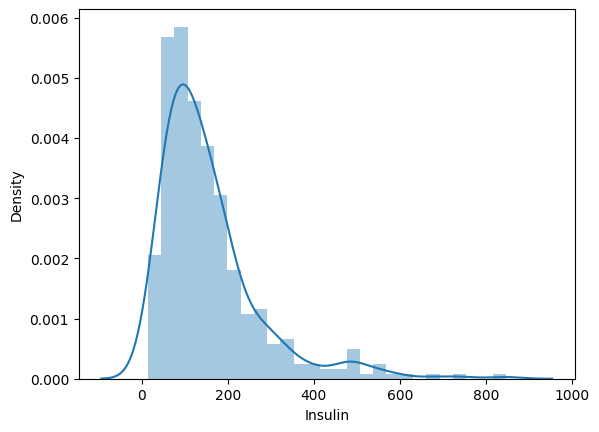

In [16]:
sns.distplot(train["Insulin"])

<Axes: ylabel='Insulin'>

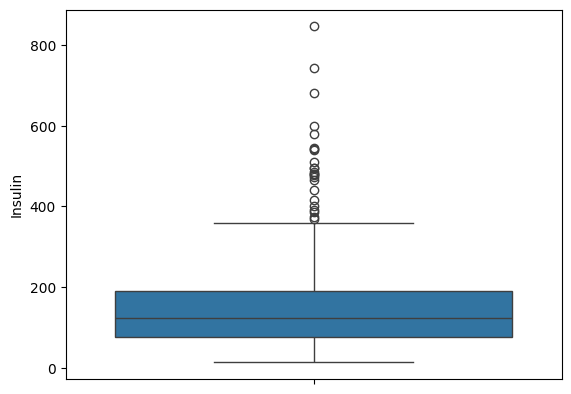

In [18]:
sns.boxplot(train["Insulin"])

In [19]:
desc = train["Insulin"].describe()
desc

,Insulin
count,394.000000
mean,155.548223
std,118.775855
min,14.000000
25%,76.250000
50%,125.000000
75%,190.000000
max,846.000000


In [20]:
# IQR =  3IQR - 1IQR
# OUT > 3IQR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [21]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [22]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(394, 9)


(370, 9)


## 학습, 예측에 사용할 컬럼

In [9]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 정답값이자 예측해야 될 값

In [10]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Insulin"
label_name

'Insulin'

## 학습, 예측 데이터셋 만들기

In [11]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
X_train.shape

(394, 8)

In [12]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(394,)

In [13]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [14]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
         RandomForestRegressor(random_state=42),
         GradientBoostingRegressor(random_state=42)
        ]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [24]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([24, 22, 29, 17,  8, 20, 18, 26, 15,  7])

In [25]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.83137113, 0.32336147, 0.85840665, 0.60188663, 0.46162568,
       0.52036029, 0.40897105, 0.97981873, 0.4473362 , 0.67721387])

In [26]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [27]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []

    max_depth = np.random.randint(5, 30, 100)
    max_features = np.random.uniform(0.3, 1.0, 100)

    param_distributions = {"max_depth": max_depth, "max_features": max_features }

    regressor = RandomizedSearchCV(estimator,
        param_distributions,
        n_iter=100,
        scoring=None,
        n_jobs=-1,
        cv=5,
        verbose=2,
        random_state=42)

    regressor.fit(X_train, y_train)

    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [28]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.31821263122402366, 'max_dep...","DecisionTreeRegressor(max_depth=np.int64(5),\n...",-0.008345,"{'mean_fit_time': [0.006180477142333984, 0.007..."
1,RandomForestRegressor,"{'max_features': 0.7004433287420875, 'max_dept...","(DecisionTreeRegressor(max_depth=np.int64(13),...",0.303995,"{'mean_fit_time': [0.37399802207946775, 0.9976..."
2,GradientBoostingRegressor,"{'max_features': 0.5820253434841507, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.224766,"{'mean_fit_time': [0.37745351791381837, 0.4875..."


In [29]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(max_depth=np.int64(13),
                      max_features=np.float64(0.7004433287420875),
                      random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [30]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=np.int64(13),
                      max_features=np.float64(0.7004433287420875),
                      random_state=42)

## cross validation 으로 학습 세트의 오차 측정하기

In [31]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


array([ 46.13394246, 258.01990693, 103.05755556, 322.81      ,
       262.36939394])

<Axes: xlabel='Insulin'>

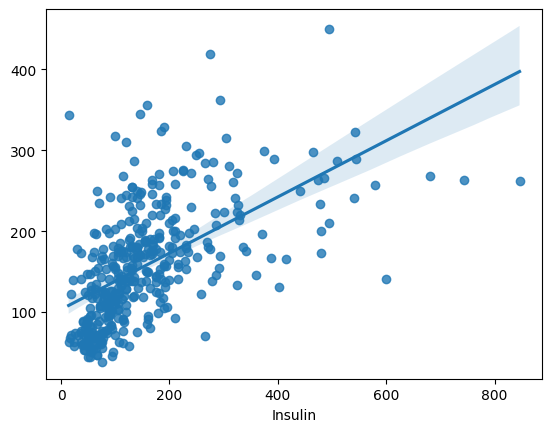

In [32]:
# regplot 으로 결과 값을 비교합니다.

sns.regplot(x=y_train, y=y_predict)

In [33]:
# r2_score 를 구합니다.

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.323561769644391

<Axes: ylabel='Density'>

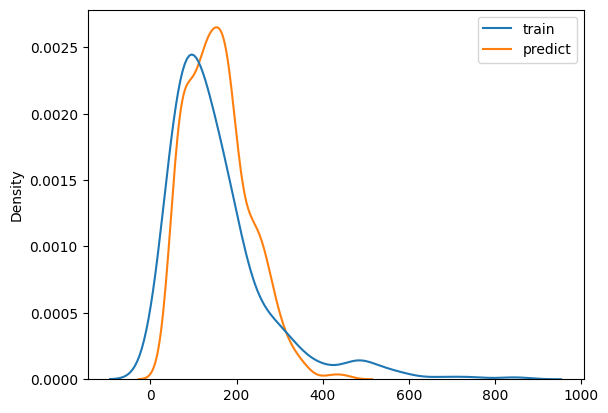

In [34]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

# sns.distplot(y_train, hist=False, label="train")
# sns.distplot(y_predict, hist=False, label="predict")
sns.kdeplot(data=pd.DataFrame({"train":y_train, "predict":y_predict}))

## 오차 구하기

In [35]:
# MAE
# 86
# 77.55
# 62.05
# 44.385 - RandomSearchCV
error = abs(y_train - y_predict)
error.mean()

np.float64(64.00327115803519)

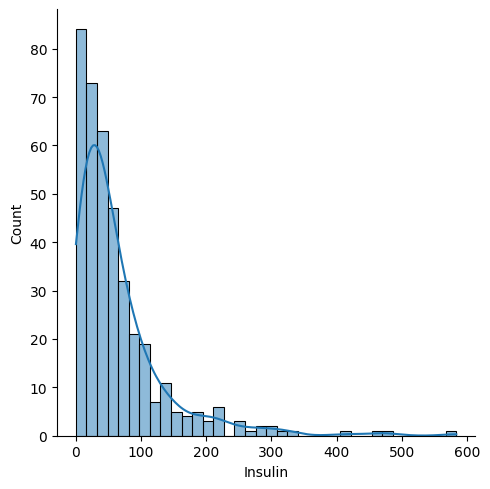

In [36]:
sns.displot(error, kde=True)

In [37]:
error.describe()

,Insulin
count,394.000000
mean,64.003271
std,73.730238
min,0.395833
25%,18.757881
50%,40.730750
75%,79.043654
max,583.630606


In [38]:
# RMSE
# 126.895
# 114.077 (Insulin<600)
# 84
# 59.68
np.sqrt(((y_train - y_predict) ** 2).mean())

np.float64(97.56418087087548)

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.
* 피처의 중요도를 구합니다.

In [39]:
# 피처의 중요도를 추출하기
best_estimator.feature_importances_

array([0.04472833, 0.40196739, 0.06938045, 0.08946736, 0.12448146,
       0.10063096, 0.1371174 , 0.03222663])

<Axes: >

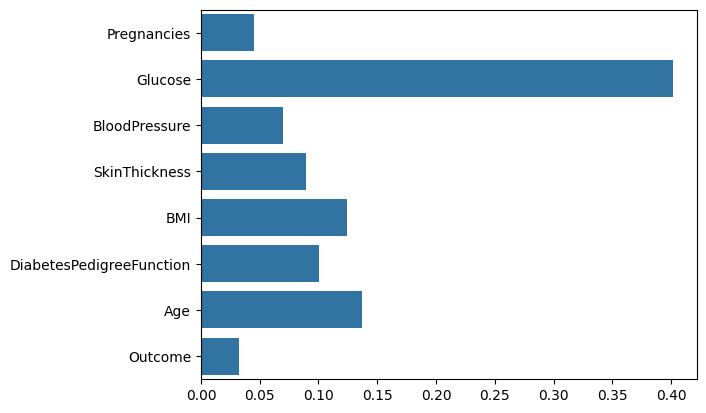

In [40]:
# 피처의 중요도 시각화 하기
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [41]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([186.71425155,  58.17572626, 238.18982684, 146.28582234,
       186.52725   ])

In [42]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [43]:
test["Insulin"] = y_test

In [44]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,149.837186,66.590233,46.648124,97.003818,141.442924,185.036934,416.526667
1,138.0,218.968497,79.722083,83.842238,167.598188,198.259654,257.122177,584.020000


<Axes: xlabel='Outcome', ylabel='Insulin'>

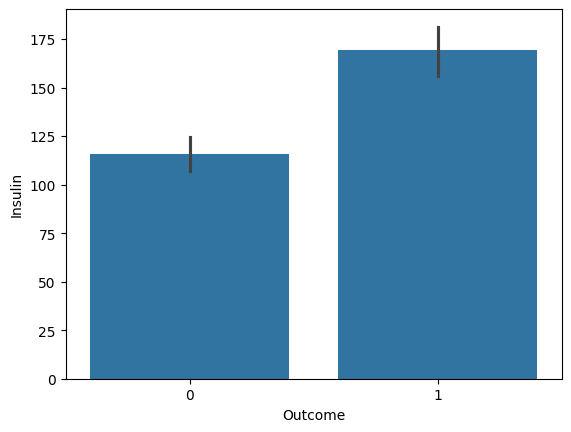

In [45]:
# Insulin 평균값을 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<Axes: xlabel='Outcome', ylabel='Insulin'>

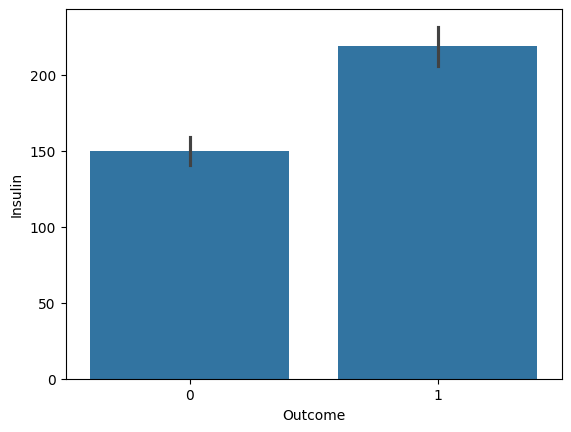

In [46]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")

## 예측값을 CSV 파일로 저장하기
* 랜덤값을 넣어서 최적의 파라메터를 찾았기 때문에 예측한 Insulin 값이 영상과 다를 수 있습니다.

In [47]:
df.loc[df["Insulin"] == 0, "Insulin"]

,Insulin
0,0
1,0
2,0
5,0
7,0
...,...
761,0
762,0
764,0
766,0


In [48]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

/tmp/ipython-input-3896317032.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[186.71425155  58.17572626 238.18982684 146.28582234 186.52725
 298.67       169.95265801 237.46427543 205.00448718 131.77291775
 147.16822453 140.50757576 268.74794805 129.77360227 255.09620833
 144.14814383 196.86153608  92.66452381 140.78049278 185.86211364
 167.4748067  104.8530119  211.09920437 105.39272619 238.81773016
 290.027      225.22777289  46.64812381 141.73132872 136.09
  59.1752381  253.39650794  88.295      161.01904076  86.4326
 165.73002098  72.22179642 142.22530497 200.18813131 174.59270833
  48.30900794  54.16        94.36833333  95.31726956 224.05571429
 118.16936179 112.30333333  83.3        127.77552252 278.57475
 152.78698718 114.04401181  82.695      330.19666667  84.98816032
 262.14530519 255.20133333 167.508      103.81806349  98.0684127
  89.319      375.66706061 174.53622819  94.304       90.349

In [53]:
df.to_csv("data/diabetes_fill_insulin.csv", index=False)

In [52]:
pd.read_csv("data/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,186.714252,33.6,0.627,50,1
1,1,85,66,29,58.175726,26.6,0.351,31,0
2,8,183,64,0,238.189827,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,168.914430,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,203.904715,30.1,0.349,47,1
